In [115]:
# start(title) --> crate blog outline ---> create content based on   ---> end
#                                           title + outline


# prompt chaining >> multile time llm call

In [116]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict, Literal, Annotated

In [117]:
load_dotenv()

True

In [118]:
model=ChatGroq(model='llama-3.1-8b-instant')


In [119]:
# model testing: 

model.invoke('hy').content

'Hello. Is there something I can help you with?'

In [120]:
# define state 
class BLOGState(TypedDict): 
    title: str
    outline: str
    content: str
    evaluate: Annotated[Literal[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "overall evaluation rating should be in the range of 0 to 10"]

In [121]:
def create_outline(state: BLOGState)-> BLOGState: 

    title=state['title']

    prompt=f'Create a detailed outline for blog on the titel: {title}'

    outline=model.invoke(prompt).content

    state['outline']=outline

    return state

In [122]:
def create_content(state: BLOGState)-> BLOGState: 
    title=state['title']
    outline=state['outline']

    prompt=f'create a detailed content on title: {title} following outline: {outline}'

    content=model.invoke(prompt).content
    state['content']=content

    return state

In [123]:
# define graph: 
graph=StateGraph(BLOGState)

# add nodes : 
graph.add_node('create_outline', create_outline)
graph.add_node('create_content', create_content)

# add edges: 
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_content')
graph.add_edge('create_content', END)

# compile: 
worflow=graph.compile()

In [124]:
# execute worflow: 
initial_state={'title': 'Impact of AI in India'}
final_state=worflow.invoke(initial_state)


In [125]:
final_state

{'title': 'Impact of AI in India',
 'outline': '**Title:** The Impact of AI in India: Opportunities, Challenges, and Future Prospects\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its growing importance globally\n* Context of AI in India: current state, government initiatives, and industry trends\n* Thesis statement: AI has the potential to revolutionize various sectors in India, but it also poses significant challenges that need to be addressed.\n\n**II. Economic Impact of AI in India**\n\n* Job creation and employment opportunities in AI-related fields\n* Boost to industries such as healthcare, finance, and education through automation and efficiency\n* Potential for AI-driven entrepreneurship and startups in India\n* Challenges: job displacement, income inequality, and skills mismatch\n\n**III. Transformative Impact of AI on Key Sectors in India**\n\n* **Healthcare:**\n + Early diagnosis and disease detection through AI-powered medical imaging\n + Pe

In [126]:
final_state['title']

'Impact of AI in India'

In [127]:
print(final_state['outline'])

**Title:** The Impact of AI in India: Opportunities, Challenges, and Future Prospects

**I. Introduction**

* Brief overview of Artificial Intelligence (AI) and its growing importance globally
* Context of AI in India: current state, government initiatives, and industry trends
* Thesis statement: AI has the potential to revolutionize various sectors in India, but it also poses significant challenges that need to be addressed.

**II. Economic Impact of AI in India**

* Job creation and employment opportunities in AI-related fields
* Boost to industries such as healthcare, finance, and education through automation and efficiency
* Potential for AI-driven entrepreneurship and startups in India
* Challenges: job displacement, income inequality, and skills mismatch

**III. Transformative Impact of AI on Key Sectors in India**

* **Healthcare:**
 + Early diagnosis and disease detection through AI-powered medical imaging
 + Personalized medicine and treatment plans
 + Telemedicine and remote 

In [128]:
print(final_state['content'])

**The Impact of AI in India: Opportunities, Challenges, and Future Prospects**

**I. Introduction**

Artificial Intelligence (AI) has been making significant waves globally, transforming industries and revolutionizing the way we live and work. In India, AI has been gaining traction, with the government and industry stakeholders recognizing its potential to drive growth and development. The current state of AI in India is marked by government initiatives, industry trends, and a growing ecosystem of startups and researchers. However, AI also poses significant challenges that need to be addressed. This paper aims to explore the impact of AI in India, highlighting opportunities, challenges, and future prospects.

The Government of India has launched several initiatives to promote AI research and development, including the National Policy on Artificial Intelligence 2018. The policy aims to promote AI research and development in India, encourage AI adoption in various sectors, and establish 

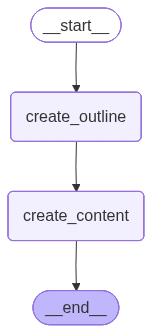

In [129]:
worflow